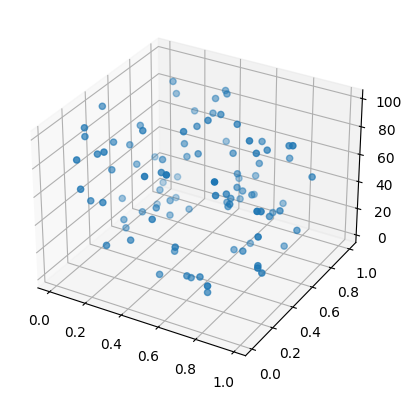

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.gaussian_process.kernels import RBF

# Simulación de datos
np.random.seed(0)
x = np.random.uniform(0, 1, 100)
y = np.random.uniform(0, 1, 100)
z = np.random.uniform(0, 100, 100)

# plot x,y,z
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z)
plt.show()

In [9]:
# Calcula las distancias y las diferencias cuadradas
dists = pdist(
    np.vstack((x, y)).T
)  # Aplanar `dists` para que coincida con `vario_cloud`
print(dists)
dists_sq = squareform(dists)  # Matriz de distancias cuadradas
print(dists_sq)

[0.44044154 0.07875763 0.28439917 ... 0.83231869 0.18071853 0.90611622]
[[0.         0.44044154 0.07875763 ... 0.6773835  0.68015238 0.59607713]
 [0.44044154 0.         0.4785788  ... 0.69525801 0.24057063 0.72926797]
 [0.07875763 0.4785788  0.         ... 0.75544196 0.71393846 0.66944175]
 ...
 [0.6773835  0.69525801 0.75544196 ... 0.         0.83231869 0.18071853]
 [0.68015238 0.24057063 0.71393846 ... 0.83231869 0.         0.90611622]
 [0.59607713 0.72926797 0.66944175 ... 0.18071853 0.90611622 0.        ]]


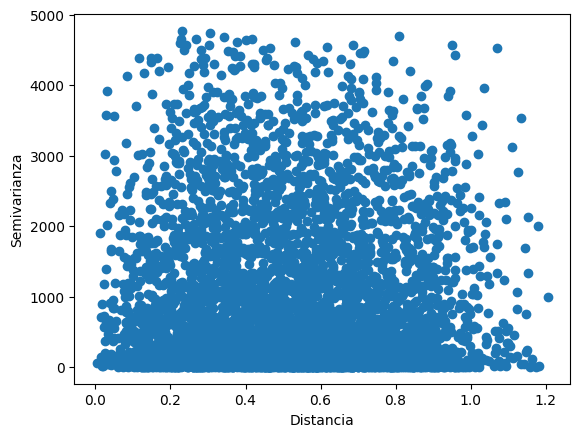

In [8]:
vario_cloud = 0.5 * (pdist(z.reshape(-1, 1)) ** 2)

# plot vario_cloud
plt.plot(dists, vario_cloud, "o")
plt.xlabel("Distancia")
plt.ylabel("Semivarianza")
plt.show()

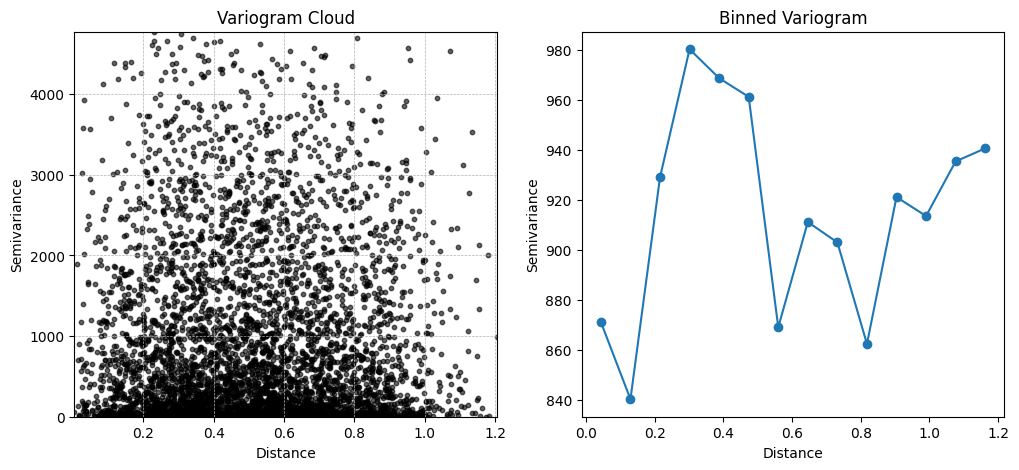

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.gaussian_process.kernels import RBF

# Simulación de datos
np.random.seed(0)
x = np.random.uniform(0, 1, 100)
y = np.random.uniform(0, 1, 100)
z = np.random.uniform(0, 100, 100)

# Calcula las distancias y las diferencias cuadradas
dists = pdist(np.vstack((x, y)).T)  # Convertir a un vector de distancias
dists_sq = squareform(dists)  # Matriz de distancias cuadradas
vario_cloud = 0.5 * (pdist(z.reshape(-1, 1)) ** 2)

# Aplanar `dists` para que coincida con `vario_cloud`
dists = dists  # `dists` ya está en formato vectorial

# Plot: Configurar 1 fila, 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Variogram cloud
axs[0].scatter(
    dists, vario_cloud[: len(dists)], color="black", edgecolor="black", alpha=0.6, s=10
)
axs[0].set_title("Variogram Cloud")
axs[0].set_xlabel("Distance")
axs[0].set_ylabel("Semivariance")

# Ajustes adicionales
axs[0].set_xlim([min(dists), max(dists)])
axs[0].set_ylim([0, max(vario_cloud[: len(dists)])])
axs[0].grid(True, which="both", linestyle="--", linewidth=0.5)


# Binned Variogram
bins = np.linspace(0, np.max(dists), 15)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
semivariance = np.zeros_like(bin_centers)

for i in range(len(bin_centers)):
    mask = (dists >= bins[i]) & (dists < bins[i + 1])
    semivariance[i] = np.mean(vario_cloud[mask])

axs[1].plot(bin_centers, semivariance, "o-")
axs[1].set_title("Binned Variogram")
axs[1].set_xlabel("Distance")
axs[1].set_ylabel("Semivariance")

# Mostrar gráficos
plt.show()